<a href="https://colab.research.google.com/github/ImHyunSeok/lim_in_aiffel5th/blob/main/%ED%8B%80%EB%A6%B0%EB%85%B8%ED%8A%B8%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

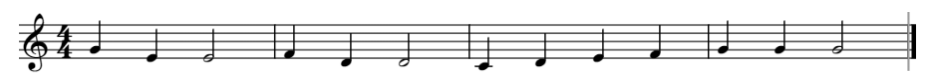

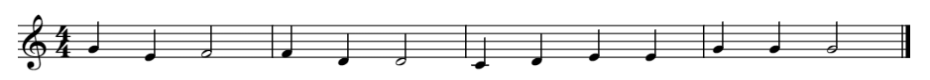

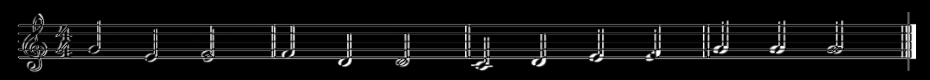

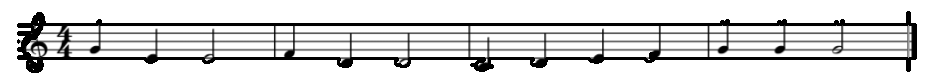

In [ ]:
# import cv2
# from google.colab.patches import cv2_imshow

# def find_score_differences(actual_score_path, performed_score_path):
#     # Load the actual and performed scores as images
#     actual_score = cv2.imread(actual_score_path, cv2.IMREAD_GRAYSCALE)
#     performed_score = cv2.imread(performed_score_path, cv2.IMREAD_GRAYSCALE)

#     # Resize the images
#     target_width = 930
#     target_height = 80
#     actual_score = cv2.resize(actual_score, (target_width, target_height))
#     performed_score = cv2.resize(performed_score, (target_width, target_height))

#     # Compute absolute difference between the two images
#     difference_image = cv2.absdiff(actual_score, performed_score)

#     # Threshold the difference image to highlight changes
#     _, thresholded_image = cv2.threshold(difference_image, 30, 255, cv2.THRESH_BINARY)

#     # Find contours of the differences
#     contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Draw rectangles around the differences
#     diff_image_with_boxes = actual_score.copy()
#     cv2.drawContours(diff_image_with_boxes, contours, -1, (0, 0, 255), 2)

#     # Show the images with differences
#     cv2_imshow(actual_score)
#     cv2_imshow(performed_score)
#     cv2_imshow(difference_image)
#     cv2_imshow(diff_image_with_boxes)

# # Paths to actual and performed scores
# actual_score_path = '/content/악보1.PNG'
# performed_score_path = '/content/악보2.PNG'

# # Call the function to find and visualize the differences
# find_score_differences(actual_score_path, performed_score_path)


In [4]:
import mido
from mido import MidiFile

def compare_midi_notes(original_file, played_file):
    original_midi = MidiFile(original_file)
    played_midi = MidiFile(played_file)

    # 비교를 위한 변수 초기화
    note_diff_count = 0

    for i, (original_msg, played_msg) in enumerate(zip(original_midi.play(), played_midi.play())):
        # note_on은 소리가 나는 상태를 의미
        if original_msg.type == 'note_on' and played_msg.type == 'note_on':
            # 오리지날 노트와 연주한 노트가 틀리다면
            if original_msg.note != played_msg.note:
                # 틀린 부분의 노트를 각각 프린트
                print(f"Measure {i+1}: Original Note {original_msg.note}, Played Note {played_msg.note}")
                note_diff_count += 1

    print(f"Total note differences: {note_diff_count}")

# 원래 MIDI 파일과 당신이 연주한 MIDI 파일 경로를 넣어주세요
original_midi_path = '/학교종correct.mid'
played_midi_path = '/학교종틀린거.mid'

compare_midi_notes(original_midi_path, played_midi_path)



Measure 5: Original Note 64, Played Note 65
Measure 19: Original Note 65, Played Note 64
Total note differences: 2


In [7]:
!pip install music21
from music21 import converter, stream, note, meter

def visualize_wrong_notes_sheet(original_file, played_file):
    original_score = converter.parse(original_file)
    played_score = converter.parse(played_file)

    # 틀린 음표를 저장할 Part 생성
    wrong_notes_part = stream.Part()
    wrong_notes_part.append(meter.TimeSignature('4/4'))  # 시간 표시 추가 (선택사항)

    for i, (original_note, played_note) in enumerate(zip(original_score.flat.notes, played_score.flat.notes)):
        if original_note.nameWithOctave != played_note.nameWithOctave:
            wrong_notes_part.append(original_note)
            wrong_notes_part.append(played_note)

    if len(wrong_notes_part) > 1:
        # 틀린 음표를 포함한 스코어 생성
        wrong_notes_score = stream.Score()
        wrong_notes_score.append(wrong_notes_part)

        # 악보 출력
        wrong_notes_score.show()
    else:
        print("No wrong notes found.")

# 원래 MIDI 파일과 당신이 연주한 MIDI 파일 경로를 넣어주세요
original_midi_path = '/학교종correct.mid'
played_midi_path = '/학교종틀린거.mid'

visualize_wrong_notes_sheet(original_midi_path, played_midi_path)


/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


SubConverterException: ignored